In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [42]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [43]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    print(center)
    label = k_m.labels_
    return(label, center)

In [44]:
h , w, c = img.shape
Z = img.reshape((-1,3))
K = 2
label, center = km_clust(Z, K)
center = np.uint8(center[:,:3])
center

[[107.69008695  95.56129696  71.60061825]
 [163.22597756 197.72311134 120.58332123]]


array([[107,  95,  71],
       [163, 197, 120]], dtype=uint8)

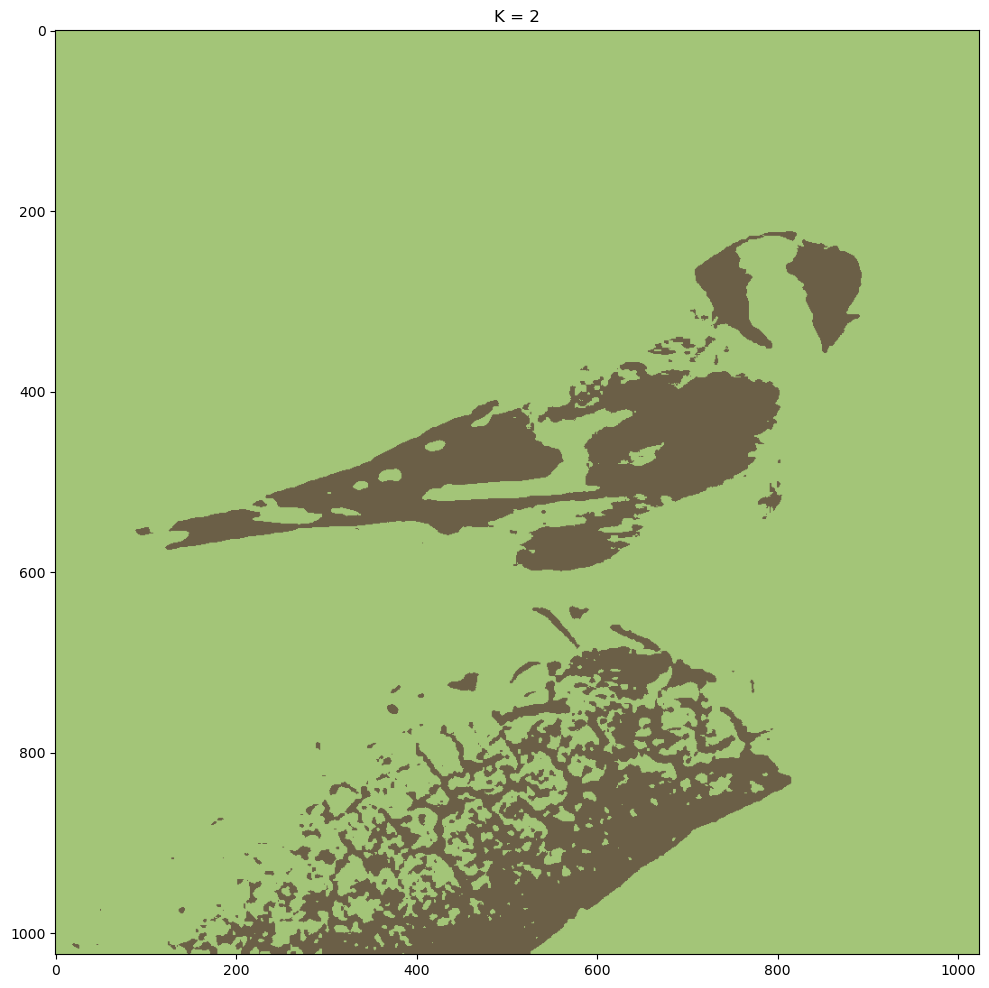

In [45]:
res = center[label.flatten()]
res = res.reshape(img.shape)
plt.figure(figsize=(16,12))
plt.title("K = {}".format(K))
plt.imshow(res)

## 1-2. cluster with RGB values and the location

[[154.52792509 186.82168625 117.15278601 508.67226685 254.93326808]
 [156.36271689 180.02199057 110.30829613 514.314711   766.88520223]]
[[157.15593716 179.20567713 122.96395116 768.15152536 254.76876738]
 [151.73130204 193.78295207 111.14105892 255.84463566 256.17844913]
 [157.26952545 182.93577807 111.29057316 766.76309262 766.90971249]
 [155.64652485 177.65530753 109.53411572 255.06957967 768.03886901]]
[[151.99931599 194.09310066 111.72777171 167.10308556 170.48391321]
 [147.80300454 145.98821401 104.59003039 795.32591758 517.90324695]
 [157.15073742 182.10412501 114.12254578 165.98203097 851.82262693]
 [159.88346793 202.08760116 117.65603688 856.91362006 857.76585223]
 [154.09055034 188.68082864 108.71584218 232.02943506 510.61909353]
 [150.52246018 191.97070165 112.19268567 514.50127707 216.47411542]
 [164.28998535 187.39178071 134.3282444  855.48744926 171.39753086]
 [160.07704086 181.53726348 110.53779047 510.91803104 806.75462722]]
[[162.4965423  210.35214432 119.01291056 382.

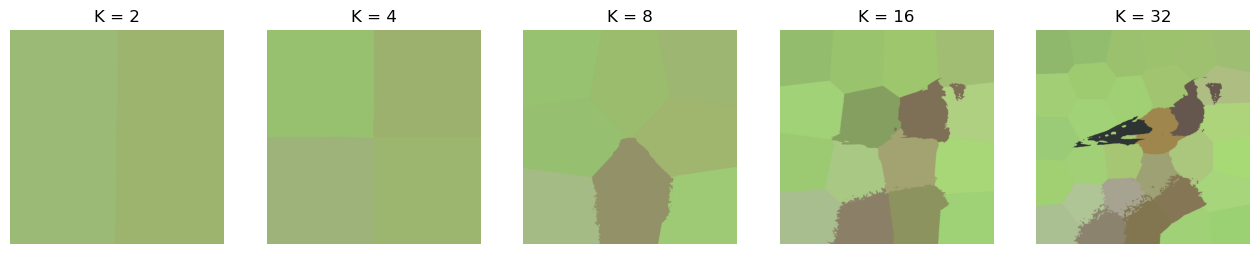

In [46]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [47]:
img.shape

(1024, 1024, 3)

[[157.87361933 193.03343506 119.89645534 122.253703    61.00878844]
 [153.27682645 174.80784263 108.19916811 132.90416027 187.69765213]]
[[167.57577111 206.36679468 123.00710824 170.47032484 211.58994495]
 [157.87507302 192.31998735 112.38089634  45.48804846 126.87911386]
 [114.25544595 102.22330632  76.2192694  173.91405075 137.38921532]
 [166.13034259 200.20993368 129.35491936 165.61393943  50.99925624]]
[[164.60159775 211.3521763  120.35828327 194.57195265 212.34249427]
 [167.98341189 200.42678933 133.59001092 188.09878745  53.02936162]
 [166.64238109 198.50086815 122.24243114  56.61915512 220.72623001]
 [ 47.13436321  48.03443763  45.95924966 116.67633247 136.7047525 ]
 [156.21769809 200.984843   114.54802873  67.55092951  41.87057993]
 [162.73084401 145.18126634 105.90308051 124.19461396 156.60379987]
 [158.05369537 199.65473124 110.68449494  45.10213595 126.0267161 ]
 [132.15124468 119.83165358  90.23028737 218.41679237 127.92487726]]
[[186.75012366 187.13509102 176.70877028 222.

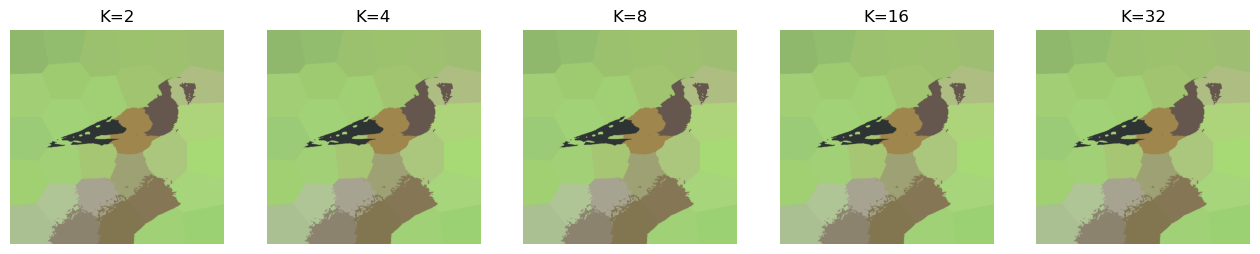

In [56]:
h, w, c=img.shape
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w]=np.append(img[h][w], [[h/4], [w/4]])
Z=Z.reshape(-1, 5)
Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16, 12))
for i , K in enumerate(Ks):
    laber, center= km_clust(Z, K)
    center = np.uint8(center[:, :3])
    plt.subplot(1, len(Ks), i+1)
    plt.axis("off")
    plt.title("K={}".format(K))
    plt.imshow(res)
plt.show()